# Importing libraries and data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D
from keras.layers import Dense, Dropout
from keras import utils
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Set the path to the directory containing the data files.
path = r'/Users/urvi/Desktop/Machine Learning with Python/Achivement 2/Climate wins 2/Data'

In [3]:
#Load the full dataset (X_full) and the target variable dataset (y) using pandas
X_full = pd.read_csv(os.path.join(path,'Original data ', 'DATASET weather_prediction_imputed.csv'), index_col= False, header=0)
y = pd.read_csv(os.path.join(path,'Original Data ','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False, header=0)

# Initial Data Exploration

In [4]:
# Display the first few rows of the datasets to verify their structure and initial contents.
X_full.head()

,YEAR,MONTH,DAY,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1960,1,1,7,0.85,1.018,0.32,0.09,0.7,6.5,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,1960,1,2,6,0.84,1.018,0.36,1.05,1.1,6.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,1960,1,3,8,0.90,1.018,0.18,0.30,0.0,8.5,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,1960,1,4,3,0.92,1.018,0.58,0.00,4.1,6.3,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,1960,1,5,6,0.95,1.018,0.65,0.14,5.4,3.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [5]:
# Display the first few rows of the datasets to verify their structure and initial contents.
y.head()

,YEAR,MONTH,DAY,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,1960,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1960,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1960,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1960,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


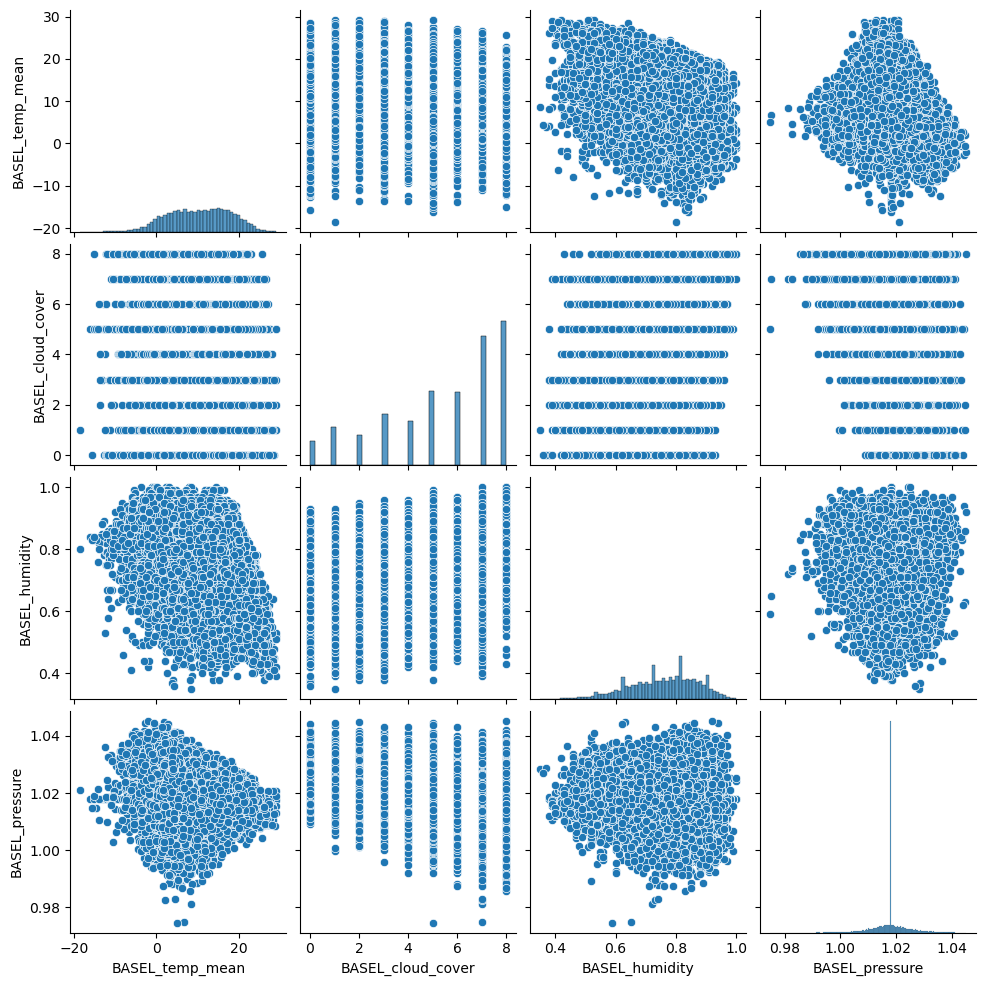

In [8]:
# Example features: 'BASEL_temp_mean', 'BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure'
# Adjust the column names based on your specific interest or based on preliminary analysis indicating significant relationships.
selected_features = ['BASEL_temp_mean', 'BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure']

# Creating a pair plot for selected features
sns.pairplot(X_full[selected_features])
plt.show()  # Display the pair plot

# Preprocessing

In [9]:
#Drop the 'YEAR', 'MONTH', and 'DAY' columns from both feature and target datasets as they are not needed for model training.
X_full.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)

In [35]:
y_name = y.columns

In [36]:
y_name

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [22]:
# Initialize a StandardScaler to normalize the feature data.
scaler = StandardScaler()
StandardScaler()

StandardScaler()

In [23]:
# Apply the scaler to X_full to create a standardized feature set X.
X = scaler.fit_transform(X_full)

In [24]:
X.shape

(22950, 135)

In [25]:
# Reshape X for compatibility with RNN input requirements (batch_size, timesteps, features).

X = X.reshape(-1,15,9)

In [26]:
print(X.shape)
print(y.shape)

(22950, 15, 9)
(22950, 15)


# Data transformation for training

In [38]:
# Convert the DataFrame y into a NumPy array y_array for processing with Keras.
y_array = y.values

In [21]:
y_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Splitting Data 

In [31]:
# Split the data into training and testing sets, with 30% of the data reserved for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16065, 15, 9)
(6885, 15, 9)
(16065, 15)
(6885, 15)


In [37]:
y_name

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [49]:
types = {0:'BASEL_pleasant_weather', 1:'BELGRADE_pleasant_weather',
       2:'BUDAPEST_pleasant_weather', 3:'DEBILT_pleasant_weather',
       4:'DUSSELDORF_pleasant_weather', 5:'HEATHROW_pleasant_weather',
       6:'KASSEL_pleasant_weather', 7:'LJUBLJANA_pleasant_weather',
       8:'MAASTRICHT_pleasant_weather', 9:'MADRID_pleasant_weather',
       10:'MUNCHENB_pleasant_weather', 11:'OSLO_pleasant_weather',
       12:'SONNBLICK_pleasant_weather', 13:'STOCKHOLM_pleasant_weather',
       14:'VALENTIA_pleasant_weather'}

In [50]:
def convert(inputx):
  for t_list in inputx:
    for i,h in enumerate(t_list):
      if h==0:
        yield f"{types[i]}".replace("_ple", "_unple")
      else:
        yield f"{types[i]}"

In [51]:
def confusion_matrix(y_true, y_pred):
    # y_true = pd.Series([types[y] for y in y_true])
    # y_pred = pd.Series([types[y] for y in np.argmax(y_pred, axis=-1)])
    # an axis of "-1" will return the last array in y_pred, i.e. the pleasant name in our case

    y_true = pd.Series(convert(y_true))
    y_pred = pd.Series(convert(y_pred))
    
    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])

# Model Setup and Training

## Model Building - Convolutional Neural Network (CNN)

In [52]:
# Initialize the sequential model framework
model = Sequential()

# Add a 1D convolutional layer with 64 filters, a kernel size of 2, ReLU activation function.
# This layer will process sequences of data (time series), extracting features from sliding windows of two time steps each.
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(15,9)))

# Add a densely connected neural network layer with 32 units and ReLU activation function.
# This layer is typically used to learn non-linear combinations of the high-level features extracted by the convolutional layers.
model.add(Dense(32, activation='relu'))

# Add a max pooling layer that reduces the dimensionality of the input, which helps in reducing overfitting and computational load.
model.add(MaxPooling1D())

# Flatten the input to make it suitable for input to the dense layer
# Converts the 2D feature maps into 1D feature vectors.
model.add(Flatten())

# Add a final densely connected neural network layer with 15 units and ReLU activation function.
# This layer outputs predictions for the 15 different classes or categories.
model.add(Dense(15, activation='relu'))

# Compile the model with categorical crossentropy as the loss function and use 'adam' optimizer.
# The metrics 'accuracy' is used to evaluate the performance of the model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Generate a summary of the model to understand its architecture including output shapes and number of parameters.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 14, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         3,375 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,671 (26.06 KB)

 Trainable params: 6,671 (26.06 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Train the model with the training data.
# The model will process the input data in batches of 32, iterating over the entire dataset 30 times (epochs).
# Verbose output is set to 1 to see progress bars during training.
model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1)

# Evaluate the trained model on the training data itself to check the performance in terms of loss and accuracy.
acc = model.evaluate(X_train, y_train)

# Print the loss and accuracy obtained from the model evaluation to understand how well the model has performed.
print('Loss:', acc[0], 'Accuracy:', acc[1])

Epoch 1/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.1220 - loss: 10.0746
Epoch 2/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.1300 - loss: 8.3518
Epoch 3/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.1728 - loss: 8.3902
Epoch 4/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.4970 - loss: nan
Epoch 5/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.6377 - loss: nan
Epoch 6/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.6383 - loss: nan
Epoch 7/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.6428 - loss: nan
Epoch 8/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.6421 - loss: nan
Epoch 9/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.6462 - loss: nan
Epoch 10/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.6366 - loss: nan
Epoch 11/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.6473 - loss: nan
Epoch 12/30
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/ste

In [60]:
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(15,9)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(15, activation='sigmoid'))  # Use sigmoid for multilabel classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
# Model Training and Evaluation
model.fit(X_train,y_train,batch_size=32, epochs=10,verbose=1)
acc = model.evaluate(X_train,y_train) #validation_data=(TeX2, TeY2) <---used for a 3-split test
print('Loss:', acc[0], 'Accuracy', acc[1])

Epoch 1/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.2069 - loss: 0.1110
Epoch 2/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.2173 - loss: 0.1124
Epoch 3/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.2213 - loss: 0.1089
Epoch 4/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.2273 - loss: 0.1081
Epoch 5/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.2200 - loss: 0.1043
Epoch 6/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.2240 - loss: 0.1015
Epoch 7/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.2220 - loss: 0.1010
Epoch 8/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.2412 - loss: 0.0952
Epoch 9/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.2213 - loss: 0.0956
Epoch 10/10
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.2384 - loss: 0.0995
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.2277 - loss: 0.0923
Loss: 0.0908237025141716 Accuracy 0.224961

## Model Building- Recurrent Neural Network (RNN)

In [66]:
# Define a list of unique location names extracted from column prefixes, excluding general date-related columns.
# locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations = ["BASEL", "BELGRADE", "BUDAPEST", "DEBILT", 
             "DUSSELDORF", "HEATHROW", "KASSEL", "LJUBLJANA", 
             "MAASTRICHT", "MADRID", "MUNCHENB", "OSLO", 
             "SONNBLICK", "STOCKHOLM", "VALENTIA"]

In [88]:
lst = np.array(lst)
y_prediction = pd.DataFrame({'BASEL': lst[:, 0], 'BELGRADE': lst[:, 1],
                             'BUDAPEST': lst[:, 2],'DEBILT': lst[:, 3],
                             'DUSSELDORF': lst[:, 4],'HEATHROW': lst[:, 5],
                             'KASSEL': lst[:, 6],'LJUBLJANA': lst[:, 7],
                             'MAASTRICHT': lst[:, 8],'MADRID': lst[:, 9],
                             'MUNCHENB': lst[:, 10],'OSLO': lst[:, 11],
                             'SONNBLICK': lst[:, 12],'STOCKHOLM': lst[:, 13],
                             'VALENTIA': lst[:, 14]})

y_test = np.array(y_test)
y_testframe = pd.DataFrame({'BASEL': y_test[:, 0], 'BELGRADE': y_test[:, 1],
                            'BUDAPEST': y_test[:, 2],'DEBILT': y_test[:, 3],
                            'DUSSELDORF': y_test[:, 4],'HEATHROW': y_test[:, 5],
                            'KASSEL': y_test[:, 6],'LJUBLJANA': y_test[:, 7],
                            'MAASTRICHT': y_test[:, 8],'MADRID': y_test[:, 9],
                            'MUNCHENB': y_test[:, 10],'OSLO': y_test[:, 11],
                            'SONNBLICK': y_test[:, 12],'STOCKHOLM': y_test[:, 13],
                            'VALENTIA': y_test[:, 14]})

In [68]:
# Import necessary layer type from Keras for RNN construction.
from tensorflow.keras.layers import SimpleRNN

# Initialize the model as a sequence of layers.
model = Sequential()

# Add a SimpleRNN layer with 64 units to process sequences of length 15 with 9 features each.
model.add(SimpleRNN(64, input_shape=(15, 9)))

# Add a densely connected layer with 15 units with a sigmoid activation function.
# Sigmoid is used because it's suitable for binary classification tasks, and in this setup, it likely indicates a multilabel classification scenario.
model.add(Dense(15, activation='sigmoid'))

# Compile the model with binary crossentropy loss, which is suitable for binary/multilabel classification tasks.
# The optimizer used is Adam, and the model will track several metrics including accuracy and AUC.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc')
])

# Generate a summary of the model to provide insights into its structure, showing layer configurations and parameter counts.
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,711 (22.31 KB)

 Trainable params: 5,711 (22.31 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Train the model with the provided training data and labels.
# The model will iterate through the data 43 times (epochs), which is a design choice likely aimed at optimizing training convergence.
model.fit(X_train, y_train, epochs=43)
model.summary()

Epoch 1/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8064 - auc: 0.8685 - fn: 7513.1387 - fp: 11627.2500 - loss: 0.3934 - precision: 0.5626 - recall: 0.7141 - tn: 83421.5703 - tp: 18635.2402
Epoch 2/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9118 - auc: 0.9629 - fn: 5857.3750 - fp: 4905.2915 - loss: 0.2025 - precision: 0.8038 - recall: 0.7692 - tn: 90229.0547 - tp: 20205.4785
Epoch 3/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9235 - auc: 0.9715 - fn: 4929.4624 - fp: 4312.3271 - loss: 0.1791 - precision: 0.8288 - recall: 0.8095 - tn: 90987.8906 - tp: 20967.5234
Epoch 4/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9302 - auc: 0.9767 - fn: 4356.8096 - fp: 3983.2441 - loss: 0.1640 - precision: 0.8458 - recall: 0.8319 - tn: 90829.2656 - tp: 22027.8867
Epoch 5/43
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9384 - auc: 0.9814 - fn: 3795.1052 - fp: 3595.2778 - loss: 0.1474 - precision: 0.8619 - recall: 0.8555 - tn: 91152.6562 -

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,135 (66.94 KB)

 Trainable params: 5,711 (22.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,424 (44.63 KB)

In [73]:
# Use the trained model to make predictions on the test data.
scores = model.predict(X_test)

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


In [84]:
# Prepare to convert the prediction results (likely probabilities) into binary (0 or 1) decisions for each location.
lst = []
for n in range(len(scores)):
    lst.append([int(round(elem, 0)) for elem in list(scores[n])])

# Convert list to a NumPy array for easier manipulation and DataFrame creation.
lst = np.array(lst)

In [94]:
y_testframe.head() 

,BASEL,BELGRADE,BUDAPEST,DEBILT,DUSSELDORF,HEATHROW,KASSEL,LJUBLJANA,MAASTRICHT,MADRID,MUNCHENB,OSLO,SONNBLICK,STOCKHOLM,VALENTIA
0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
y_prediction.head()

,BASEL,BELGRADE,BUDAPEST,DEBILT,DUSSELDORF,HEATHROW,KASSEL,LJUBLJANA,MAASTRICHT,MADRID,MUNCHENB,OSLO,SONNBLICK,STOCKHOLM,VALENTIA
0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,1,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
y_prediction.nunique()

BASEL         2
BELGRADE      2
BUDAPEST      2
DEBILT        2
DUSSELDORF    2
HEATHROW      2
KASSEL        2
LJUBLJANA     2
MAASTRICHT    2
MADRID        2
MUNCHENB      2
OSLO          2
SONNBLICK     1
STOCKHOLM     2
VALENTIA      2
dtype: int64

# Model Predictions and Evaluation

In [64]:
pred = model.predict(X_test)
#pred_y = pred.argmax(axis=-1)

# Evaluate
print(confusion_matrix(y_test, pred))#model.predict(TeX2))

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
Pred                           BASEL_pleasant_weather  \
True                                                    
BASEL_pleasant_weather                           1701   
BASEL_unpleasant_weather                         5184   
BELGRADE_pleasant_weather                           0   
BELGRADE_unpleasant_weather                         0   
BUDAPEST_pleasant_weather                           0   
BUDAPEST_unpleasant_weather                         0   
DEBILT_pleasant_weather                             0   
DEBILT_unpleasant_weather                           0   
DUSSELDORF_pleasant_weather                         0   
DUSSELDORF_unpleasant_weather                       0   
HEATHROW_pleasant_weather                           0   
HEATHROW_unpleasant_weather                         0   
KASSEL_pleasant_weather                             0   
KASSEL_unpleasant_weather                           0   
LJUBLJANA_pleasant_weather                   

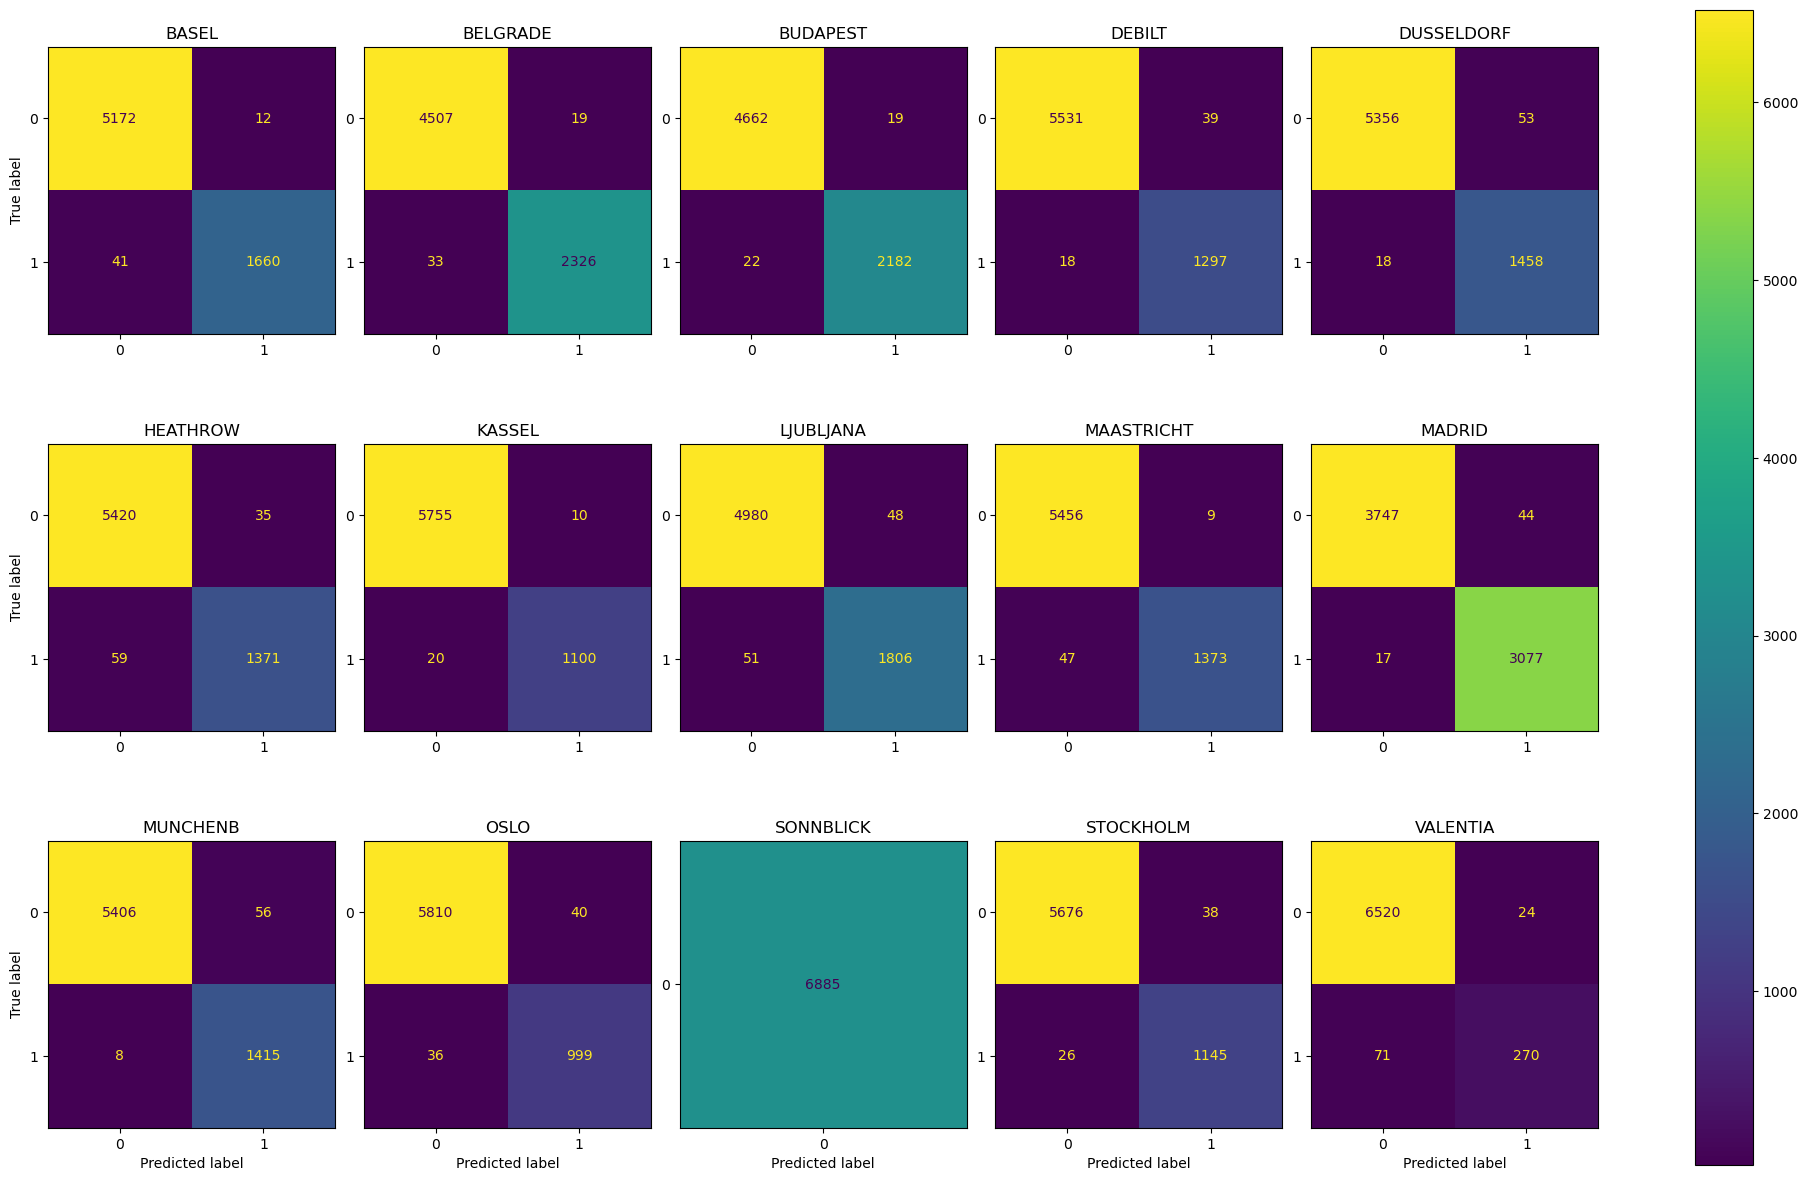

In [105]:
# Create subplots
f, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.ravel()

for i in range(15):
    if i == 12:
        labels = [0]
    else:
        labels = [0, 1]
    cm = confusion_matrix(y_test[:, i], lst[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels)
    disp.plot(ax=axes[i], values_format='.4g')
    axes[i].set_title(locations[i])  # Fixed the typo here
    if i < 10:
        axes[i].set_xlabel('')
    if i % 5 != 0:
        axes[i].set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
plt.colorbar(disp.im_, ax=axes)
plt.show()